In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Example 1: Class exercise 
Given the vector `val = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],`

write two different sets of code to compute the squares of all the elements in the vector `val`

In [2]:
#Solution
val = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
print val**2


[  1   4   9  16  25  36  49  64  81 100]


In [3]:
val  = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10] )#this is called a list
newval = np.zeros(val.size)

for ii in val-1:
    newval[ii] = val[ii]**2
print newval

[  1.   4.   9.  16.  25.  36.  49.  64.  81. 100.]


### Example 2
Write three different codes to compute the value of $f(3)$ if $f(x) = x^3 + 3x^2 - 2x - 1$


In [4]:
#solution 1
x=3
f =  x**3 + 3.*x**2 - 2.*x - 1.

print f

47.0


In [5]:
#solution 2
def funcf(x):
    f2 =  x**3 + 3.*x**2 - 2.*x - 1.
    print f2

In [6]:
#running the code for solution 2 with x=3
funcf(3)

47.0


In [7]:
#solution 3
f = lambda x:  x**3 + 3.*x**2 - 2.*x - 1. 

f(3)


47.0

### Example 3
Write a code to compute the value of $f(3)$ and  $f(1)$ if $f(x) = x^3 + 3x^2 - 2x - 1$



In [8]:
f = lambda x:  x**3 + 3.*x**2 - 2.*x - 1.
fa, fb = f(3), f(1)
print fa, fb



47.0 1.0


### Example 4
Write two different codes to compute the value of $f(x,y)$ when $x = 3$ and $y=2$ if $f(x,y) = y(x^3 + 3x^2 - 2x - 1)$



In [9]:
#solution 1
f = lambda x, y:  y*(x**3 + 3.*x**2 - 2.*x - 1.)

f(3,2)

94.0

In [10]:
#solution 2
def funcf2(x,y):
    fval_2 =  y*(x**3 + 3.*x**2 - 2.*x - 1.)
    print fval_2

In [11]:
#running the code for solution 2 with x=3
funcf2(3,2)

94.0


# Root Finding

## Bisection Method
The point of this section is pretty straightforward.  I give you a function $f(x)$ and an interval, say $[a,b]$.  Now you tell me those points $c_{\ast}\in[a,b]$ such that 

$$
f(c_{\ast}) = 0.
$$

The first approach we are going to study is called the _ Bisection Method _.  It relies on there being a sign change over the interval $[a,b]$.  Said another way, for the Bisection Method to work we need

> ** Criteria for Bisection Method **: For the Bisection method to work on an interval $[a,b]$, we need $f$ to be continuous on $[a,b]$, and we need $f(a)f(b)<0$.

The sign change ensures that there is some point $c \in (a,b)$ such that $f(c)=0$. Once we know the criteria is met, the method goes as follows.  

1.  Find the mid-point $c = \frac{b+a}{2}$. 
2.  Check $f(c)=0$.  If yes, you have a root.  
3.  If not, check $f(a)f(c)<0$.  If yes, you have a root in $(a,c)$.  If not, you have a root in $(c,b)$.
4.  Re-define your interval accordingly, repeat until... well what makes sense here?

![bsctmeth](https://upload.wikimedia.org/wikipedia/commons/8/8c/Bisection_method.svg)

### Example 5

We are going to write a python code to compute $\sqrt{2}$.  Let $x$ denote the answer for $\sqrt{2}$, then we can write that
$$x = \sqrt{2},$$ which is equivalent to

$$
x^{2}=2.  
$$

Subtracting 2 from both sides of the equation, we see that $\sqrt{2}$ is a root of the quadratic equation 
$$
x^{2}-2=0.
$$

So now we are going to use the __Bisection Method__ to write a code to find the roots of the function $f(x) = x^{2} - 2$.

#### solution

First lets plot the function $f(x)$ and the line $y=0$ to determine the approximate points that $f(x)=0$

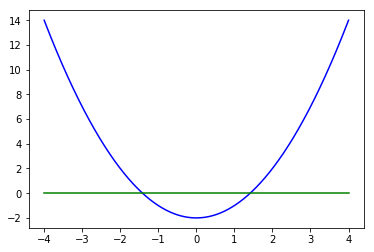

In [12]:
xvals = np.linspace(-4,4.,int(1e3))
yvals = xvals**2.- 2.
zvals = np.zeros(xvals.size)
plt.plot(xvals,yvals,color='b')
plt.plot(xvals,zvals,color='g')

From the graph, we have two points where $f(x)=0$, one is x in (-2,0) and another is x in (0,2). We work out the Python code below.

In [13]:

def bisec_method(a,b,f,tol):
    fa,fb = f(a),f(b)
    
    if fa*fb<0:
        c = (a+b)/2.
        capproxs = np.array([c]) # build an array to record the estimates we make for the root
        fc = f(c)
        while np.abs(fc)>=tol:
            if fa*fc<0:
                b = c
            else:
                a = c
          
            c = (a+b)/2.
            capproxs = np.append(capproxs,c)
            fc = f(c)
     
        print "Our root is: %1.15f" %c
    else:
        print "Cannot ensure existence of root."

In [14]:
f = lambda x: x**2 - 2.



In [15]:
#The first root is between the x interval (0,2)
bisec_method(0.,2.,f,1e-13)

Our root is: 1.414213562373106


In [16]:
#The second root is between the x interval (-2,0)
bisec_method(-2.,0.,f,1e-13)

Our root is: -1.414213562373106


### Example 6
Use the __Bisection Method__ to write a code to find the roots of the function $f(x) = x^3 + 3x^2 - 2x - 1.$.

##### solution

In [17]:
f = lambda x: x**3 + 3.*x**2 - 2.*x - 1.

In [18]:
#The first root is between the x interval (-5,3)
bisec_method(-5.,3.,f,1e-13)

Our root is: -3.490863615361036


In [19]:
#The second root is between the x interval (-1,0)
bisec_method(-1,0.,f,1e-13)


Our root is: -0.343379568952912


In [20]:
#The third root is between the x interval (0,2)
bisec_method(0.,2.,f,1e-13)

Our root is: 0.834243184313920


## Rate of Convergence

We now want a means of figuring out how fast the Bisection Method runs.  So, if you think about it, at every iteration of the method, an approximation, say $c_{n}$, to the root, say $c_{\ast}$, is generated.  For the method to converge, we mean that 

$$
\lim_{n\rightarrow \infty} c_{n} = c_{\ast},
$$

or equivalently

$$
\lim_{n\rightarrow \infty} \left|c_{n} - c_{\ast}\right|=0,
$$

But the question then becomes, how quickly does this limit go to zero?  

_Problem_: Can you do this for the Bisection Method?  In other words, is there a formula you can write down which tells you how quickly $|c_{n}-c_{\ast}|$ goes to zero?

In general, we think of answering this question by defining what is called the rate of convergence.

> ** Rate of Convergence **: For an iterative sequence $c_{n}\rightarrow c_{\ast}$, we define the rate of convergence, $\alpha$, to be $$\lim_{n\rightarrow\infty}\frac{\left|c_{n+1}-c_{\ast}\right|}{\left|c_{n}-c_{\ast}\right|^{\alpha}} = \lambda $$.

The idea here is that for very large $n$, we have that 

$$
\left|c_{n+1}-c_{\ast}\right| \approx \lambda \left|c_{n}-c_{\ast}\right|^{\alpha}
$$

_Problem_: What would a logarithm tell you?  How would you use that to numerically compute the rate of convergence?  

_Problem_: Modify your code for the Bisection Method to find the rate of convergence.  Does it agree with your theoretical prediction?  

In [21]:
def convergence_plotter(cvals):
    clen = cvals.size
    cstr = cvals[clen-1]
    xvals = np.ma.log10(np.abs(cvals[:clen-3] - cstr))
    yvals = np.ma.log10(np.abs(cvals[1:clen-2] - cstr))
    ylen = yvals.size
    plt.plot(xvals,yvals,'*')
    slopes = (yvals[1:]-yvals[:ylen-1])/(xvals[1:]-xvals[:ylen-1])
    print 'The computed value of the maximum slope is %.15f'%np.max(slopes)
    print 'The computed value of the minimum slope is %.15f'%np.min(slopes)
    print 'The average value of the computed slope is %.15f'%np.mean(slopes)

In [22]:
f = lambda x: x**3 + 3.*x**2 - 2.*x - 1.

def Modified_bisec_method(a,b,f,tol):
    fa,fb = f(a),f(b)
    if fa*fb<0:
        c = (a+b)/2.
        capproxs = np.array([c]) # build an array to record the estimates we make for the root
        fc = f(c)
        while np.abs(fc)>=tol:
            if fa*fc<0:
                b = c
            else:
                a = c
                fa = fc
            c = (a+b)/2.
        
            capproxs = np.append(capproxs,c)
            fc = f(c)
        convergence_plotter(capproxs)
        print "Our root is: %1.15f" %c
    else:
        print "Cannot ensure existence of root."

The computed value of the maximum slope is 5.442399619751442
The computed value of the minimum slope is -109.999847426379446
The average value of the computed slope is -4.706422797968955
Our root is: -3.490863615361032


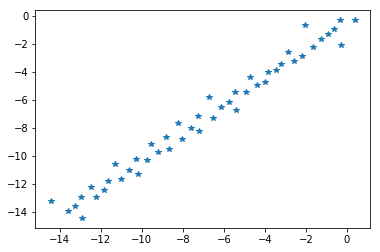

In [23]:
Modified_bisec_method(-5.,3.,f,1e-16)

## Newton's Method

The idea here is to use the tangent line approximation of a function, say $f(x)$, to approximate a root.  By this we mean, at the point $(x,f(x))$, finding a root $x_{\ast}$ by solving 

$$
0 = f(x) + f'(x)(x_{\ast}-x),
$$
which upon solving for the root $x_{\ast}$, gives us 

$$
x_{\ast} = x - \frac{f(x)}{f'(x)}.
$$

However, we imagine this only works if $x$ is very close to $x_{ast}$.  However, if that is the case, then if we turn this in to an interative method via the formula,

$$
x_{n} = x_{n-1} - \frac{f(x_{n-1})}{f'(x_{n-1})}, ~ n\geq 1
$$

then by repeating this process again and again, we should get closer and closer to the actual root.  

![nwtmeth](https://upload.wikimedia.org/wikipedia/commons/e/e0/NewtonIteration_Ani.gif)
_ Problem _: You code this up!

Using Newton's method,write a code to find a root of the following function $$ f(x) = x^3 +3x^2 -2x -1$$

In [24]:
f = lambda x: x**3. + 3.*x**2. - 2.*x - 1
fp = lambda x: 3.*x**2. + 6.*x - 2.

def Newtons_method(f,fp,x0,tol):
    x1 = x0 - f(x0)/fp(x0)
    
    while np.abs(x1-x0):
        x0 = x1
        x1 = x0 - f(x0)/fp(x0)
        
    print "A root of f(x) is: %1.15f" %x1

In [25]:
Newtons_method(f,fp,-3.,1e-8)

A root of f(x) is: -3.490863615361032


## The Secant Method

We note that Newton's method suffers from a couple of flaws.  First, it will not work if $f'(x_{\ast})=0$.  Further, if $\left|f'(x_{\ast})\right|\ll 1$, it will work very, very slowly.  Further, we also note that the method requires us to compute a derivative of what could be very complicated functions.  Thus, it turns out that by using an approximation to the derivative of the form

$$
f'(x_{n}) \approx \frac{f(x_{n})-f(x_{n-1})}{x_{n}-x_{n-1}},
$$

we can partially get around some of these problems.  This approach is called the _ Secant Method _.  

Recall _Newton method_ is:
$$
x_{n} = x_{n-1} - \frac{f(x_{n-1})}{f'(x_{n-1})}, ~ n\geq 1
$$
replacing $f'(x_{n-1})$ with the following approximation for the derivative 
$$
f'(x_{n-1}) \approx \frac{f(x_{n-1})-f(x_{n-2})}{x_{n-1}-x_{n-2}}, n\ge 2
$$

gives the _secant method_:
$$
x_{n} = x_{n-1} - \frac{f(x_{n-1})(x_{n-1}-x_{n-2})}{f(x_{n-1})-f(x_{n-2})}, ~ n\geq 1
$$

Notice that the secant method, requires two input guesses $x_0$ and $x_1$.

See if you can code it up. 

#### Example:
a) Write a program that uses the _secant method_ to determine the roots of a function $f(x)$ with initial guess $x_0$ and $x_1$.

b) Graph the function $$f(x)= x\cos(x) - \sin^2(x)$$ along with the line y=0 on the same graph.

c) Using Secant method, Find the root of the function $$f(x)= x\cos(x) - \sin^2(x).$$ For the initial guess, use $x_0=1$ and $x_1=2$.

In [26]:
def secant_method_mod(f,x0,x1,tol):
    f0 = f(x0)
    f1 = f(x1)
    x2 = x1 - f1*(x1-x0)/(f1-f0)
    
    while np.abs(f1) >= tol:
        x0 = x1
        x1 = x2
        f0 = f1
        f1 = f(x1)
        x2 = x1 - f1*(x1-x0)/(f1-f0)
    
    print "A root of f(x) is: %1.15f" %x2 

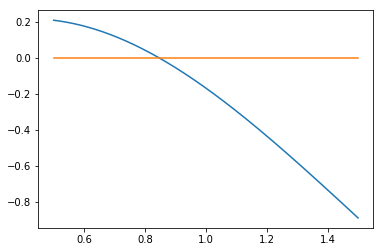

In [27]:

xvals = np.linspace(.5,1.5,int(1e3)+1)
zvals = np.zeros(xvals.size)
f = lambda x: x*np.cos(x) - (np.sin(x))**2.

plt.figure(1)
plt.plot(xvals,f(xvals))
plt.plot(xvals,zvals)

In [28]:
f = lambda x: x*np.cos(x) - (np.sin(x))**2.
secant_method_mod(f,1,2,1e-16)

A root of f(x) is: 0.846446354857407
